In [49]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

# For bokeh plot
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, Legend, LegendItem, Select, CustomJS
from bokeh.palettes import Category10
from bokeh.io import output_file
from bokeh.layouts import column

### Import data

In [50]:
# Specify the full path to the CSV files
file_path_1 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\visits_df.csv"
file_path_2 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\visits_df_2022.csv"
file_path_3 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\visits_df_2023.csv"
file_path_4 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\visits_df_2024.csv"

file_path_5 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\benches_df.csv"
file_path_6 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\bench_df_s1.csv"
file_path_7 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\bench_df_s2.csv"
file_path_8 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\bench_df_s3.csv"
file_path_9 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\bench_df_s4.csv"

# Read data from the specified files
visits_df = pd.read_csv(file_path_1)
visits_df_2022 = pd.read_csv(file_path_2)
visits_df_2023 = pd.read_csv(file_path_3)
visits_df_2024 = pd.read_csv(file_path_4)

benches_df = pd.read_csv(file_path_5)
bench_df_s1 = pd.read_csv(file_path_6)
bench_df_s2 = pd.read_csv(file_path_7)
bench_df_s3 = pd.read_csv(file_path_8)
bench_df_s4 = pd.read_csv(file_path_9)

### Locations

In [51]:
blixvisit_location = visits_df['Lat Long'].dropna().unique()
blixvisit_location = tuple(map(float, blixvisit_location[0].split(', ')))

bench_location = benches_df['Lat Long'].dropna().unique()
bench_location

array(['-37.8027388, 144.9655868', '-37.8028278, 144.9654266'],
      dtype=object)

In [52]:
bench_location_1 = (-37.8027388, 144.9655868)
bench_location_2 = (-37.8028278, 144.9654266)

### Data for Mobile phone counting sensor

In [53]:

visitors_2022 = total_sum = visits_df_2022["total"].sum()
visitors_2023 = total_sum = visits_df_2023["total"].sum()
visitors_2024 = total_sum = visits_df_2024["total"].sum()

data_mobile  = f"""
<b>Visitors</b><br>
2022: {visitors_2022}<br>
2023: {visitors_2023}<br>
2024 (first half of the year): {visitors_2024}
"""

### Data for Benches

In [54]:
bench_df_s1['date'] = pd.to_datetime(bench_df_s1['date']) #set date to datetime-format
print(bench_df_s1['date'].dtype) #Check to see if done correctly

bench_df_s2['date'] = pd.to_datetime(bench_df_s2['date']) #set date to datetime-format
print(bench_df_s2['date'].dtype) #Check to see if done correctly

bench_df_s3['date'] = pd.to_datetime(bench_df_s3['date']) #set date to datetime-format
print(bench_df_s3['date'].dtype) #Check to see if done correctly

bench_df_s4['date'] = pd.to_datetime(bench_df_s4['date']) #set date to datetime-format
print(bench_df_s4['date'].dtype) #Check to see if done correctly


datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [55]:
#Remember sensor 1 and 2 are on bench 1
# and sensor 2 and 3 are on bench 2

# Bench 1
bench_df_s1_2021 = bench_df_s1[bench_df_s1['date'].dt.year == 2021].copy()
bench_df_s1_2022 = bench_df_s1[bench_df_s1['date'].dt.year == 2022].copy()
bench_df_s1_2023 = bench_df_s1[bench_df_s1['date'].dt.year == 2023].copy()
bench_df_s1_2024 = bench_df_s1[bench_df_s1['date'].dt.year == 2024].copy()

bench_df_s2_2021 = bench_df_s1[bench_df_s2['date'].dt.year == 2021].copy()
bench_df_s2_2022 = bench_df_s1[bench_df_s2['date'].dt.year == 2022].copy()
bench_df_s2_2023 = bench_df_s1[bench_df_s2['date'].dt.year == 2023].copy()
bench_df_s2_2024 = bench_df_s1[bench_df_s2['date'].dt.year == 2024].copy()

bench_1_2021 = bench_df_s1_2021.shape[0] + bench_df_s2_2021.shape[0]
bench_1_2022 = bench_df_s1_2022.shape[0] + bench_df_s2_2022.shape[0]
bench_1_2023 = bench_df_s1_2023.shape[0] + bench_df_s2_2023.shape[0]
bench_1_2024 = bench_df_s1_2022.shape[0] + bench_df_s2_2024.shape[0]

data_bench_1  = f"""
<b>Visitors</b><br>
2021: {bench_1_2021}<br>
2022: {bench_1_2022}<br>
2023: {bench_1_2023}<br>
2024: {bench_1_2024}<br>
"""

C:\Users\Bruger\AppData\Local\Temp\ipykernel_27116\3409072699.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bench_df_s2_2021 = bench_df_s1[bench_df_s2['date'].dt.year == 2021].copy()
C:\Users\Bruger\AppData\Local\Temp\ipykernel_27116\3409072699.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bench_df_s2_2022 = bench_df_s1[bench_df_s2['date'].dt.year == 2022].copy()
C:\Users\Bruger\AppData\Local\Temp\ipykernel_27116\3409072699.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bench_df_s2_2023 = bench_df_s1[bench_df_s2['date'].dt.year == 2023].copy()
C:\Users\Bruger\AppData\Local\Temp\ipykernel_27116\3409072699.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bench_df_s2_2024 = bench_df_s1[bench_df_s2['date'].dt.year == 2024].copy()


In [56]:
# Bench 2
bench_df_s3_2021 = bench_df_s3[bench_df_s3['date'].dt.year == 2021].copy()
bench_df_s3_2022 = bench_df_s3[bench_df_s3['date'].dt.year == 2022].copy()
bench_df_s3_2023 = bench_df_s3[bench_df_s3['date'].dt.year == 2023].copy()
bench_df_s3_2024 = bench_df_s3[bench_df_s3['date'].dt.year == 2024].copy()

bench_df_s4_2021 = bench_df_s4[bench_df_s4['date'].dt.year == 2021].copy()
bench_df_s4_2022 = bench_df_s4[bench_df_s4['date'].dt.year == 2022].copy()
bench_df_s4_2023 = bench_df_s4[bench_df_s4['date'].dt.year == 2023].copy()
bench_df_s4_2024 = bench_df_s4[bench_df_s4['date'].dt.year == 2024].copy()

bench_2_2021 = bench_df_s3_2021.shape[0] + bench_df_s4_2021.shape[0]
bench_2_2022 = bench_df_s3_2022.shape[0] + bench_df_s4_2022.shape[0]
bench_2_2023 = bench_df_s3_2023.shape[0] + bench_df_s4_2023.shape[0]
bench_2_2024 = bench_df_s3_2022.shape[0] + bench_df_s4_2024.shape[0]

data_bench_2  = f"""
<b>Visitors</b><br>
2021: {bench_2_2021}<br>
2022: {bench_2_2022}<br>
2023: {bench_2_2023}<br>
2024: {bench_2_2024}<br>
"""

### Generate map

In [57]:
# Start map
map_center = blixvisit_location
m = folium.Map(location=map_center, zoom_start=18)

# Add range from mobile sensor
folium.Circle(
    location=blixvisit_location,
    radius=30,  # radius in meters
    color='blue',
    opacity=0.3,  # lower value = more transparent line
    fill=True,
    fill_color='blue',
    fill_opacity=0.2,
    tooltip="Range of 30 m for the mobile phone counting sensor",  # shows when hover
).add_to(m)

# Add markers
folium.Marker(
    location=blixvisit_location,
    popup=folium.Popup(data_mobile, max_width=300),  # shows when clicked
    tooltip="Mobile phone counting sensor",  # shows when hover
    icon=folium.Icon(color="blue", icon="cloud") 
).add_to(m)

folium.Marker(
    location= bench_location_1,
    popup=folium.Popup(data_bench_1, max_width=300),  # shows when clicked
    tooltip="Bench 1",  # shows when hover
    icon=folium.Icon(color="purple", icon="certificate")  
).add_to(m)

folium.Marker(
    location= bench_location_2,
    popup=folium.Popup(data_bench_2, max_width=300),  # shows when clicked
    tooltip="Bench 2",  # shows when hover
    icon=folium.Icon(color="purple", icon="certificate")  
).add_to(m)
    

# Show map (in Jupyter Notebook)
m

# Save and show in webbrowser
m.save("city park map.html")
import webbrowser
webbrowser.open("city park map.html")


True

### Bokeh plot with combined data for 2022

In [58]:
bench_df_s1_2022.head()

,dwell,temp,date,time,hour
6990,6.183333,23.0,2022-01-01,03:48:21,3
6991,2.966667,22.0,2022-01-01,04:48:40,4
6992,3.183333,22.0,2022-01-01,04:55:57,4
6993,7.416667,35.0,2022-01-01,12:20:30,12
6994,11.150000,35.5,2022-01-01,12:30:16,12


In [59]:
visits_df_2022.head()

,datetime,venueId,total,dwell,Sensor Name,Sensor Type,Lat Long,avg_dwell,Latitude,Longitude,date,time,hour
0,2022-12-16 21:00:00+11:00,7780,422,107188,Pedestrian Sensor-Argyle Sq,Mobile phone counting,"-37.8025805, 144.9656012",4.0,-37.80258,144.965601,2022-12-16,21:00:00,21
1,2022-12-23 14:00:00+11:00,7780,351,170937,Pedestrian Sensor-Argyle Sq,Mobile phone counting,"-37.8025805, 144.9656012",8.0,-37.80258,144.965601,2022-12-23,14:00:00,14
2,2022-12-23 21:00:00+11:00,7780,504,193032,Pedestrian Sensor-Argyle Sq,Mobile phone counting,"-37.8025805, 144.9656012",6.0,-37.80258,144.965601,2022-12-23,21:00:00,21
3,2022-12-28 03:00:00+11:00,7780,13,2574,Pedestrian Sensor-Argyle Sq,Mobile phone counting,"-37.8025805, 144.9656012",3.0,-37.80258,144.965601,2022-12-28,03:00:00,3
4,2022-12-28 04:00:00+11:00,7780,5,2340,Pedestrian Sensor-Argyle Sq,Mobile phone counting,"-37.8025805, 144.9656012",7.0,-37.80258,144.965601,2022-12-28,04:00:00,4


In [60]:
# visits: sum total per day
visits_aggregated_2022 = visits_df_2022.groupby('date')['total'].sum().reset_index()

# bench: count rows per day
bench_aggregated_2022 = bench_df_s1_2022.groupby('date').size().reset_index(name='count')
#bench_aggregated_2022 = bench_df_s1_2022['date'].value_counts().sort_index()

# add days of the week
visits_aggregated_2022['weekday'] = pd.to_datetime(visits_aggregated_2022['date']).dt.day_name()
bench_aggregated_2022['weekday'] = pd.to_datetime(bench_aggregated_2022['date']).dt.day_name()

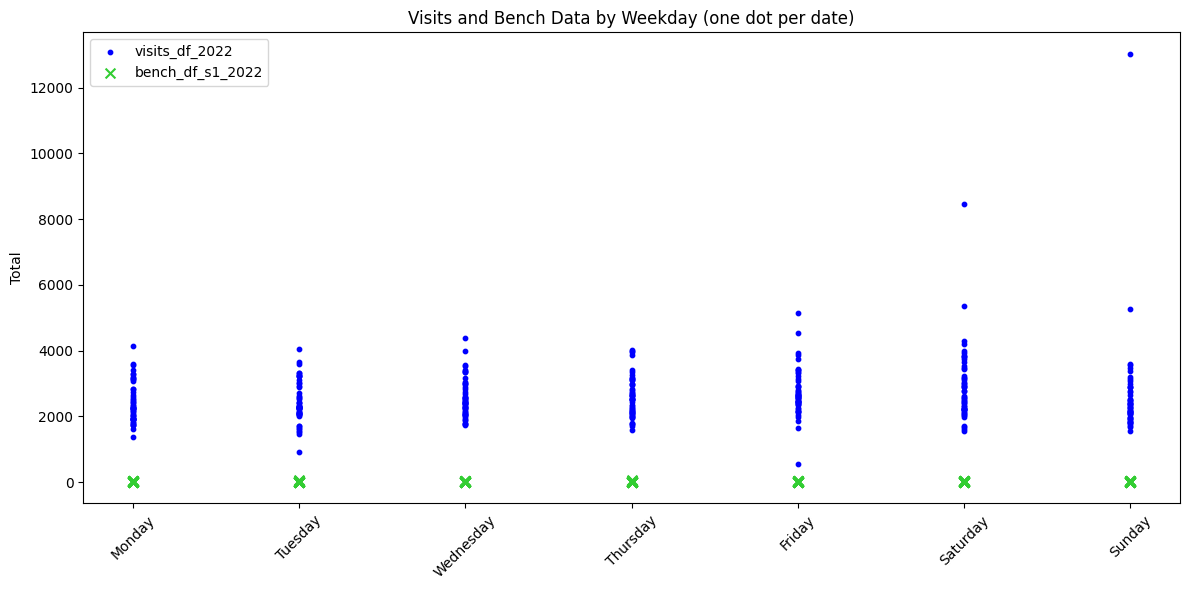

In [61]:
# Map days of the week to numbers for order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_map = {day: i for i, day in enumerate(weekday_order)}
visits_aggregated_2022['weekday_num'] = visits_aggregated_2022['weekday'].map(weekday_map)
bench_aggregated_2022['weekday_num'] = bench_aggregated_2022['weekday'].map(weekday_map)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(visits_aggregated_2022['weekday_num'], visits_aggregated_2022['total'], color='blue', s=10, label='visits_df_2022')
plt.scatter(bench_aggregated_2022['weekday_num'], bench_aggregated_2022['count'], color='limegreen', marker='x', s=50, label='bench_df_s1_2022')

plt.xticks(ticks=range(7), labels=weekday_order, rotation=45)
plt.ylabel('Total')
plt.title('Visits and Bench Data by Weekday (one dot per date)')

#plt.ylim(1, 80) #zoom

plt.legend()
plt.tight_layout()
plt.show()


In [62]:
visits_src = ColumnDataSource(data={
    'weekday': visits_aggregated_2022['weekday'],
    'value': visits_aggregated_2022['total'],
    'date': visits_aggregated_2022['date'].astype(str),
    'type': ['Visits'] * len(visits_aggregated_2022)
})

bench_src = ColumnDataSource(data={
    'weekday': bench_aggregated_2022['weekday'],
    'value': bench_aggregated_2022['count'],
    'date': bench_aggregated_2022['date'].astype(str),
    'type': ['Bench'] * len(bench_aggregated_2022)
})

# Make figure
p = figure(
    title="Interaktivt plot: Visits og Bench",
    x_range=weekday_order,
    y_axis_label="Total/Antal",
    width=900,
    height=400,
    toolbar_location="above"
)

# Draw the data dots
p.circle(x='weekday', y='value', size=6, source=visits_src,
         color=Category10[3][0], legend_label="Visits", alpha=0.6)

p.cross(x='weekday', y='value', size=10, source=bench_src,
        color=Category10[3][1], legend_label="Bench", alpha=0.8)

hover = HoverTool(tooltips=[
    ("Dato", "@date"),
    ("Antal", "@value"),
    ("Type", "@type")
])
p.add_tools(hover)

# Styling
p.legend.location = "top_left"
p.legend.click_policy = "hide"


show(p)

In [63]:
##RELEVANT?? -måske til explainer notebook? Ellers slet!
'''
##Counts visitors for december
# Make sure 'date' is in datetime format
visits_aggregated_2022['date'] = pd.to_datetime(visits_aggregated_2022['date'])

# Filter for December
december_visits = visits_aggregated_2022[visits_aggregated_2022['date'].dt.month == 12]

# Show only relevant columns
december_visits_display = december_visits[['date', 'weekday', 'total']]
december_visits_display = december_visits_display.sort_values('date')

# Vis som tabel
# Print tabellen til skærmen
#print(december_visits_display)
'''

"\n##Counts visitors for december\n# Make sure 'date' is in datetime format\nvisits_aggregated_2022['date'] = pd.to_datetime(visits_aggregated_2022['date'])\n\n# Filter for December\ndecember_visits = visits_aggregated_2022[visits_aggregated_2022['date'].dt.month == 12]\n\n# Show only relevant columns\ndecember_visits_display = december_visits[['date', 'weekday', 'total']]\ndecember_visits_display = december_visits_display.sort_values('date')\n\n# Vis som tabel\n# Print tabellen til skærmen\n#print(december_visits_display)\n"

In [64]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# ColumnDataSource for visits
visits_src = ColumnDataSource(data={
    'weekday': visits_aggregated_2022['weekday'],
    'value': visits_aggregated_2022['total'],
    'date': visits_aggregated_2022['date'].astype(str),
    'type': ['Visits'] * len(visits_aggregated_2022)
})

# ColumnDataSources for each bench dataset
def make_bench_source(df_bench_2022, name):
    return ColumnDataSource(data={
        'weekday': df_bench_2022['weekday'],
        'value': df_bench_2022['count'],
        'date': df_bench_2022['date'].astype(str),
        'type': [name] * len(df_bench_2022)
    })

for df_bench_2022 in [bench_df_s1_2022, bench_df_s2_2022, bench_df_s3_2022, bench_df_s4_2022]:
    df_bench_2022['weekday'] = pd.to_datetime(df_bench_2022['date']).dt.day_name()


def aggregate_bench(df_bench_2022):
    df_bench_2022['date'] = pd.to_datetime(df_bench_2022['date'])
    df_bench_2022['weekday'] = df_bench_2022['date'].dt.day_name()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_bench_2022['weekday_num'] = df_bench_2022['weekday'].map({day: i for i, day in enumerate(weekday_order)})
    
    # Count rows per date
    agg = df_bench_2022.groupby('date').size().reset_index(name='count')
    
    # Add weekday again after aggregation
    agg['weekday'] = agg['date'].dt.day_name()
    return agg

bench_df_s1_agg = aggregate_bench(bench_df_s1_2022)
bench_df_s2_agg = aggregate_bench(bench_df_s2_2022)
bench_df_s3_agg = aggregate_bench(bench_df_s3_2022)
bench_df_s4_agg = aggregate_bench(bench_df_s4_2022)


bench_sources = {
    'Bench S1': make_bench_source(bench_df_s1_agg, 'Bench S1'),
    'Bench S2': make_bench_source(bench_df_s2_agg, 'Bench S2'),
    'Bench S3': make_bench_source(bench_df_s3_agg, 'Bench S3'),
    'Bench S4': make_bench_source(bench_df_s4_agg, 'Bench S4'),
}


# Make figure
p = figure(
    title="Interactive plot: Visits and Bench (S1–S4) for 2022",
    x_range=weekday_order,
    y_axis_label="Total",
    width=900,
    height=400,
    toolbar_location="above"
)

# Always show visits
visits_renderer = p.circle(x='weekday', y='value', size=6, source=visits_src,
                           color=Category10[3][0], alpha=0.6)


# Bench plots
colors = Category10[4]
sensor_groups = {
    'Bench S1': 'Bench 1',
    'Bench S2': 'Bench 1',
    'Bench S3': 'Bench 2',
    'Bench S4': 'Bench 2',
}

legend_items = [LegendItem(label="Visitors", renderers=[visits_renderer])]
added_groups = set()


for i, (label, source) in enumerate(bench_sources.items()):
    color = colors[i]
    group = sensor_groups[label]

    cross = p.cross(x='weekday', y='value', size=10, source=source,
                    color=color, alpha=0.6, muted_alpha=0.1)

    # Add title as empty LegendItem (once per group)
    if group not in added_groups:
        legend_items.append(LegendItem(label=group, renderers=[]))
        added_groups.add(group)

    # Add the sensor under the group
    clean_label = label.replace("Bench S", "s")
    legend_items.append(LegendItem(label=clean_label, renderers=[cross]))

# Add the grouped legend
legend = Legend(items=legend_items, location="top_left", click_policy="mute", label_text_font_size="10pt")
p.add_layout(legend)



hover = HoverTool(tooltips=[
    ("Dato", "@date"),
    ("Antal", "@value"),
    ("Type", "@type")
])
p.add_tools(hover)

# Styling
p.legend.location = "top_left"
p.legend.click_policy = "mute"

# Save and show in browser
output_file("Bokeh plot with combined data for 2022.html", title="Bokeh plot with combined data for 2022")


show(p)


### Bokeh plot for 2023

In [65]:
# visits: total total per day
visits_aggregated_2023 = visits_df_2023.groupby('date')['total'].sum().reset_index()

# add days of the week
visits_aggregated_2023['weekday'] = pd.to_datetime(visits_aggregated_2023['date']).dt.day_name()


In [66]:
# ColumnDataSource for visits
visits_src = ColumnDataSource(data={
    'weekday': visits_aggregated_2023['weekday'],
    'value': visits_aggregated_2023['total'],
    'date': visits_aggregated_2023['date'].astype(str),
    'type': ['Visits'] * len(visits_aggregated_2023)
})

# ColumnDataSources for each bench dataset
def make_bench_source(df_bench_2023, name):
    return ColumnDataSource(data={
        'weekday': df_bench_2023['weekday'],
        'value': df_bench_2023['count'],
        'date': df_bench_2023['date'].astype(str),
        'type': [name] * len(df_bench_2023)
    })

for df_bench_2023 in [bench_df_s1_2023, bench_df_s2_2023, bench_df_s3_2023, bench_df_s4_2023]:
    df_bench_2023['weekday'] = pd.to_datetime(df_bench_2023['date']).dt.day_name()



def aggregate_bench(df_bench_2023):
    df_bench_2023['date'] = pd.to_datetime(df_bench_2023['date'])  
    df_bench_2023['weekday'] = df_bench_2023['date'].dt.day_name()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_bench_2023['weekday_num'] = df_bench_2023['weekday'].map({day: i for i, day in enumerate(weekday_order)})
    
    # Count rows per date
    agg_2023 = df_bench_2023.groupby('date').size().reset_index(name='count')
    
    # Add weekday again after aggregation
    agg_2023['weekday'] = agg_2023['date'].dt.day_name()
    return agg_2023

bench_df_s1_agg_2023 = aggregate_bench(bench_df_s1_2023)
bench_df_s2_agg_2023 = aggregate_bench(bench_df_s2_2023)
bench_df_s3_agg_2023 = aggregate_bench(bench_df_s3_2023)
bench_df_s4_agg_2023 = aggregate_bench(bench_df_s4_2023)


bench_sources = {
    'Bench S1': make_bench_source(bench_df_s1_agg_2023, 'Bench S1'),
    'Bench S2': make_bench_source(bench_df_s2_agg_2023, 'Bench S2'),
    'Bench S3': make_bench_source(bench_df_s3_agg_2023, 'Bench S3'),
    'Bench S4': make_bench_source(bench_df_s4_agg_2023, 'Bench S4'),
}


# Make figure
p = figure(
    title="Interactive plot: Visits and Bench (S1–S4) for 2023",
    x_range=weekday_order,
    y_axis_label="Total",
    width=900,
    height=400,
    toolbar_location="above"
)

# Always show visitors
visits_renderer = p.circle(x='weekday', y='value', size=6, source=visits_src,
                           color=Category10[3][0], alpha=0.6)


# Bench plots
colors = Category10[4]
sensor_groups = {
    'Bench S1': 'Bench 1',
    'Bench S2': 'Bench 1',
    'Bench S3': 'Bench 2',
    'Bench S4': 'Bench 2',
}

legend_items = [LegendItem(label="Visitors", renderers=[visits_renderer])]
added_groups = set()


for i, (label, source) in enumerate(bench_sources.items()):
    color = colors[i]
    group = sensor_groups[label]

    cross = p.cross(x='weekday', y='value', size=10, source=source,
                    color=color, alpha=0.6, muted_alpha=0.1)

    # Add title as empty LegendItem (once per group)
    if group not in added_groups:
        legend_items.append(LegendItem(label=group, renderers=[]))
        added_groups.add(group)

    # Add the sensor under the group
    clean_label = label.replace("Bench S", "s")
    legend_items.append(LegendItem(label=clean_label, renderers=[cross]))

# Add the grouped legend
legend = Legend(items=legend_items, location="top_left", click_policy="mute", label_text_font_size="10pt")
p.add_layout(legend)


hover = HoverTool(tooltips=[
    ("Dato", "@date"),
    ("Antal", "@value"),
    ("Type", "@type")
])
p.add_tools(hover)

# Styling
p.legend.location = "top_left"
p.legend.click_policy = "mute"  

# Save and show in browser
output_file("Bokeh plot with combined data for 2023.html", title="Bokeh plot with combined data for 2023")


show(p)


### Bokeh plot with combined data for 2022 and 2023

In [67]:
# Visits Combined
visits_aggregated_2022['year'] = "2022"
visits_aggregated_2023['year'] = "2023"
visits_combined = pd.concat([visits_aggregated_2022, visits_aggregated_2023])
visits_combined['weekday'] = pd.to_datetime(visits_combined['date']).dt.day_name()
visits_combined['type'] = "Visits"
visits_combined.rename(columns={'total': 'value'}, inplace=True)

visits_source_all = ColumnDataSource(visits_combined)
visits_source_view = ColumnDataSource(visits_combined[visits_combined['year'] == '2022'])

# Bench Combined
def combine_bench(agg_2022, agg_2023, label):
    df_2022 = agg_2022.copy()
    df_2023 = agg_2023.copy()
    df_2022['year'] = '2022'
    df_2023['year'] = '2023'
    df_all = pd.concat([df_2022, df_2023])
    df_all['type'] = label
    df_all['weekday'] = pd.to_datetime(df_all['date']).dt.day_name()
    df_all.rename(columns={'count': 'value'}, inplace=True)
    return df_all

bench_dataframes = {
    'Bench S1': combine_bench(bench_df_s1_agg, bench_df_s1_agg_2023, 'Bench S1'),
    'Bench S2': combine_bench(bench_df_s2_agg, bench_df_s2_agg_2023, 'Bench S2'),
    'Bench S3': combine_bench(bench_df_s3_agg, bench_df_s3_agg_2023, 'Bench S3'),
    'Bench S4': combine_bench(bench_df_s4_agg, bench_df_s4_agg_2023, 'Bench S4'),
}

bench_sources_all = {label: ColumnDataSource(df) for label, df in bench_dataframes.items()}
bench_views = {label: ColumnDataSource(df[df['year'] == '2022']) for label, df in bench_dataframes.items()}

# Calculate max value for y-axis
max_visits = visits_combined['value'].max()
max_bench = max([df['value'].max() for df in bench_dataframes.values()])
y_max = max(max_visits, max_bench) * 1.1

# Make figure
p = figure(
    title="Interactive plot: Visits and Bench (sensor 1 – sensor 4) for 2022 and 2023",
    x_range=weekday_order,
    y_range=(-1000, y_max),
    y_axis_label="Total",
    width=900,
    height=400,
    toolbar_location="above"
)

# Visits
visits_renderer = p.circle(
    x='weekday', y='value', size=6, source=visits_source_view,
    color=Category10[3][0], alpha=0.6
)

# Bench
colors = Category10[4]
sensor_groups = {
    'Bench S1': 'Bench 1',
    'Bench S2': 'Bench 1',
    'Bench S3': 'Bench 2',
    'Bench S4': 'Bench 2',
}
legend_items = [LegendItem(label="Visitors", renderers=[visits_renderer])]
added_groups = set()

for i, (label, source) in enumerate(bench_views.items()):
    color = colors[i]
    group = sensor_groups[label]
    glyph = p.cross(x='weekday', y='value', size=10, source=source, color=color, alpha=0.6, muted_alpha=0.1)

    if group not in added_groups:
        legend_items.append(LegendItem(label=group, renderers=[]))
        added_groups.add(group)
    legend_items.append(LegendItem(label=label.replace("Bench S", "s"), renderers=[glyph]))

legend = Legend(items=legend_items, location="top_left", click_policy="mute", label_text_font_size="10pt")
p.add_layout(legend)

# Hover
hover = HoverTool(tooltips=[
    ("Dato", "@date{%F}"),
    ("Antal", "@value"),
    ("Type", "@type")
], formatters={"@date": "datetime"})
p.add_tools(hover)

# Dropdown
year_select = Select(title="Select year:", value="2022", options=["2022", "2023"])

# JS Callback
callback_code = """
const year = cb_obj.value;

function update_view(source_all, source_view) {
    const all_data = source_all.data;
    const new_data = {};
    for (const key in all_data) new_data[key] = [];

    for (let i = 0; i < all_data['year'].length; i++) {
        if (all_data['year'][i] === year) {
            for (const key in all_data) {
                new_data[key].push(all_data[key][i]);
            }
        }
    }
    source_view.data = new_data;
    source_view.change.emit();
}

update_view(visits_source_all, visits_source_view);

for (const key in bench_sources_all) {
    update_view(bench_sources_all[key], bench_views[key]);
}
"""

callback = CustomJS(
    args=dict(
        visits_source_all=visits_source_all,
        visits_source_view=visits_source_view,
        bench_sources_all=bench_sources_all,
        bench_views=bench_views
    ),
    code=callback_code
)
year_select.js_on_change('value', callback)


# Save and show in browser
output_file("Bokeh plot with combined data for 2022 and 2023.html", title="Bokeh plot with combined data for 2022 and 2023")
show(column(year_select, p))
